### Edge Detection in OpenCV

In [175]:
# imports the OpenCV (Open Source Computer Vision Library) module in Python. 
# OpenCV is a powerful library used for image processing, computer vision, and machine learning.
import cv2
import numpy as np
# NumPy (Numerical Python) is a powerful Python library for:
    #Working with large multi-dimensional arrays and matrices.
    #Performing mathematical and statistical operations efficiently.
    #Supporting linear algebra, Fourier transforms, and random number generation.
import matplotlib.pyplot as plt
# Matplotlib is a popular Python library for data visualization,

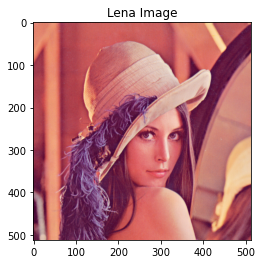

In [176]:
# Load the manually downloaded image
image = cv2.imread("lena.jpg") ## OpenCV loads images in BGR format
# The BGR format refers to the way OpenCV stores and processes color images. 
# Instead of using the more common RGB (Red, Green, Blue) format, 
# OpenCV by default loads images in BGR (Blue, Green, Red) order.

# Check if the image loaded successfully
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.title("Lena Image")
    #plt.axis("off")  # Hides the axes
    plt.show()

In [177]:
image_rgb.shape

(512, 512, 3)

In [178]:
imageR = image_rgb[:,:,0]
imageG = image_rgb[:,:,1]
imageB = image_rgb[:,:,2]
imageR.shape

(512, 512)

In [179]:
# Pandas is a Python library for data manipulation and analysis.
# It provides powerful tools for:
  #Handling structured data (tables, spreadsheets, databases)
  #Reading and writing data from CSV, Excel, JSON, SQL, etc.
import pandas as pd
# Convert to a Pandas DataFrame for better visualization
df = pd.DataFrame(imageR)

In [180]:
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
1,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
2,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
3,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
4,226,226,223,223,226,226,228,227,227,225,...,185,196,211,224,229,231,234,230,221,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,93,93,86,89,95,96,94,98,99,102,...,104,113,120,129,141,147,160,165,162,162
508,86,86,91,91,93,96,95,94,103,97,...,110,120,128,135,147,154,170,172,166,167
509,84,84,92,93,97,92,96,90,99,96,...,116,122,132,142,151,162,174,173,172,177
510,82,82,96,93,97,94,92,93,98,94,...,120,132,147,152,162,173,177,179,181,185


In [181]:
imageR.max().max()
type(imageR[0,0])

numpy.uint8

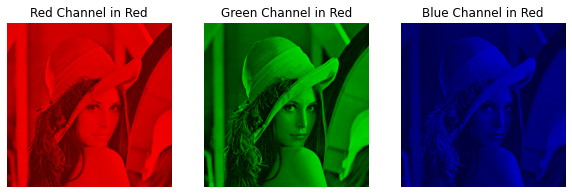

In [182]:
# Display the Red channel, Green channel, Blue channel
# Create an empty image with 3 channels (same shape as original)
red_only = np.zeros_like(image_rgb)
green_only = np.zeros_like(image_rgb)
blue_only = np.zeros_like(image_rgb)

# Set only the Red channel, keep Green and Blue as zero
red_only[:, :, 0] = imageR  # Assign Red channel
green_only[:, :, 1] = imageG  # Assign Red channel
blue_only[:, :, 2] = imageB # Assign Red channel

# Display R , G, B 
plt.figure(figsize=(10,5))

# Display the red-only image
plt.subplot(1, 3, 1)
plt.imshow(red_only)
plt.title("Red Channel in Red")
plt.axis("off")  # Hide axes


plt.subplot(1, 3, 2)
plt.imshow(green_only)
plt.title("Green Channel in Red")
plt.axis("off")  # Hide axes


plt.subplot(1, 3, 3)
plt.imshow(blue_only)
plt.title("Blue Channel in Red")
plt.axis("off")  # Hide axes
plt.show()

In [183]:
# Define a 3×3 edge detection kernel (Laplace filter)
# This 3×3 kernel (convolution filter) is specifically designed for edge detection.
kernel = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

# Apply the convolution filter
filtered_laplace = cv2.filter2D(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), -1, kernel)
# This applies the Laplace filter to an image using convolution.
# In OpenCV's cv2.filter2D() function, the second argument represents the desired depth (ddepth) of the output image.
# -1 means "same depth as the input image".
# Bit-depth refers to the number of bits used to represent each pixel in an image. 
# It determines the range of colors or intensity levels a pixel can have.
# For example:
 # -1	Same as input image (recommended for most cases)
 # cv2.CV_8U	8-bit unsigned int (0 to 255)
 # cv2.CV_16U	16-bit unsigned int (0 to 65535)
 # cv2.CV_16S	16-bit signed int (-32768 to 32767)
 # cv2.CV_32F	32-bit floating point
 # cv2.CV_64F	64-bit floating point

In [184]:
# Apply Canny Edge Detection (optimal thresholds: 100, 200)
filtered_canny = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 100, 200)

# 1️⃣ Pixels with intensity gradients above T_high (200) are considered STRONG edges → Kept as edges.
# 2️⃣ Pixels with intensity gradients below T_low (100) are considered WEAK edges → Removed.
# 3️⃣ Pixels between T_low (100) and T_high (200) are kept ONLY if they are connected to strong edges.

# cv2.Canny() does not directly accept a colored image as input. 
# It only works with grayscale images because edge detection relies on intensity gradients, not color information.

## 2. How the Laplace Kernel Works

### The Laplace kernel:
The **Laplace filter (3×3 Kernel)** is a convolution matrix used for **edge detection** in an image.

\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}

### Explanation:
- The **center value (4)** emphasizes the **current pixel’s intensity**.
- The **surrounding -1 values** subtract neighboring pixels.
- This highlights **sharp intensity changes** (edges) while suppressing uniform regions.

### Effect:
- **Regions with high contrast (edges) produce large values**.
- **Flat regions (uniform areas) remain close to zero**.
- This is useful for **edge detection** in **object recognition, medical imaging, and AI preprocessing**.

---


## 3. How Convolution Works

The filter moves across the image one pixel at a time, and at each position, the **center pixel** is replaced with a new value obtained by performing **element-wise multiplication** between the kernel and the corresponding image region, followed by summation.

### Example Image Patch (Grayscale)

Consider a **3×3 grayscale image patch**:

\begin{bmatrix}
10 & 20 & 30 \\
40 & 50 & 60 \\
70 & 80 & 90
\end{bmatrix}

### Applying Kernel Convolution:
Using the **Laplace Kernel**:

\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}

The **center pixel 50** is replaced with a new pixel value, which is calculated by performing **element-wise multiplication** between the kernel and the corresponding image region, followed by summation:

$
(0 \times 10) + (-1 \times 20) + (0 \times 30) +
(-1 \times 40) + (4 \times 50) + (-1 \times 60) +
(0 \times 70) + (-1 \times 80) + (0 \times 90)
$

$
= 0 - 20 + 0 - 40 + 200 - 60 + 0 - 80 + 0
$

$
= 0
$

### Interpretation:
- **If the region has a sharp intensity change**, the result is **high** → **edge detected**.
- **If the region is uniform**, the result is **small** → **no edge detected**.

---

This process is applied **to every pixel in the image** to highlight edges, making it a crucial step in **image processing, AI, and object recognition**.


In [185]:
# Load grayscale image
imageGray = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)

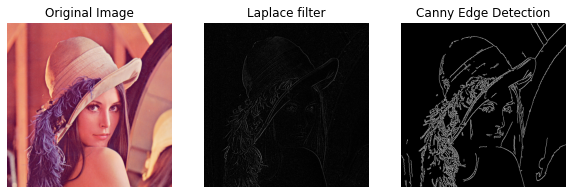

In [186]:
# Display the original and processed images
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.axis("off")  # Hide axes
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title("Laplace filter")
plt.axis("off")  # Hide axes
plt.imshow(filtered_laplace, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.axis("off")  # Hide axes
plt.imshow(filtered_canny, cmap='gray')

plt.show()

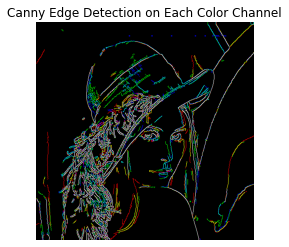

In [187]:
# Extract individual color channels
r, g, b = cv2.split(image_rgb)

# Apply Canny Edge Detection to each channel
edges_r = cv2.Canny(r, 100, 200)
edges_g = cv2.Canny(g, 100, 200)
edges_b = cv2.Canny(b, 100, 200)

# Merge edges back into a color image
edges_colored = cv2.merge([edges_r, edges_g, edges_b])

# Show the colored edge detection result
plt.imshow(edges_colored)
plt.title("Canny Edge Detection on Each Color Channel")
plt.axis("off")
plt.show()


In [188]:
dog_color = cv2.imread("dog.jpeg")
dog_rgb = cv2.cvtColor(dog_color, cv2.COLOR_BGR2RGB)

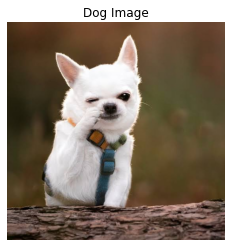

In [189]:
plt.imshow(dog_rgb)
plt.title("Dog Image")
plt.axis("off")  # Hides the axes
plt.show()

In [190]:
# Apply Canny Edge Detection (optimal thresholds: 100, 200)
dog_edges_color = cv2.Canny(cv2.cvtColor(dog_color, cv2.COLOR_RGB2GRAY), 100, 200)

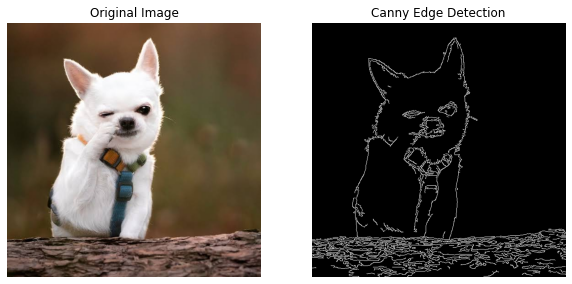

In [191]:
# Display the original and processed images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.axis("off")  # Hide axes
plt.imshow(dog_rgb)

plt.subplot(1, 2, 2)
plt.title("Canny Edge Detection")
plt.axis("off")  # Hide axes
plt.imshow(dog_edges_color, cmap='gray')

plt.show()